# Problem 6

## The washing out of the priors

People object to Bayesianism on the ground that the prior is subjective. One Bayesian response is that the differences between priors get "washed out" as one further and further updates. In the text, we quoted from Howson-Urbach. Here is a similar statement from a philosophy of science textbook:

> This illustrates a general feature of Bayes' rule. Suppose that there are two people with differing prior probabilities-- as far apart as you like provided that neither has an extreme value of 0 or 1. Then, if they agree on the likelihoods and if they share the same observational evidence, their posterior probabilities will get closer and closer as the evidence accumulates. The influence of the prior probabilities on the posterior probabilities decreases as more and more evidence becomes available. This phenomenon of washing out of the prior should help to ease the worry we might have about appealing to admittedly subjective degrees of convention in our evaluations of scientific hypotheses ({cite}`Salmon1999-ki` p. 83)

The aim of this problem is for us to explore whether this is true, in the most hands on way possible, so that we can approach it without having to take it on the testimony of others that the priors will wash out.

## Before proceeding further

Before proceeding further, please follow the following instructions:

1. Click on the <i class="fa fa-rocket" aria-hidden="true"></i> icon at the top center-right, which will launch the page in a binder (experience suggests that Firefox and Chrome work best)

2. After it loads (it takes about 3-5 minutes), use the menu bars to access:

- View | Collapse All Code

- Run | Run All Cells

3. Click on the three dots right below "Setting four values" 


## Setting four values

In [1]:
n = 500     # number of trials n in Binom(n,θ)

m = 99     # number of elements m of the parameter space {1/(m+1), 2/(m+1), ..., m/(m+1)} 

            # θ_i refers to (i+1)/(m+1) for i=0,1,...,m-1

            # e.g. θ_0 is 1/(m+1), θ_1 is 2/(m+1), θ_2 is 3/(m+1), ... , θ_{m-1} is m/(m+1)

my_data = [185, 167, 189, 439, 89, 255, 222, 408, 190, 57]  

        # as many data points as you want, as long as they are integers ≤ n

my_non_uniform_value = 0.5

        # change the prior probability so that (m/2)/(m+1)) has this value, and the others are uniform across the remaining amount

        # e.g. if you choose .5 then the other m-1 many parameters will be set to .5/(m-1)


## The problem 

Three separate times, 

- choose values of n,m,my_data, and my_non_uniform_value and write them down

- choose the menu option Run | Run All Cells

- look at the outcomes in the two series of pie chairs and write down in 1-2 complete English sentences whether the last posterior in the uniform case ended up being similar to the last posterior in the non-uniform case

- for full credit, get at least one example where the last posteriors were different and write 1-2 sentences offering an explanation of what was responsible for this non-washing-out-of-the-priors. 

## Outcome with uniform prior

In [2]:
import numpy as np
import math
import pandas as pd
from scipy.stats import norm, poisson, binom
from tabulate import tabulate
import matplotlib
from IPython.display import display, Markdown
import matplotlib.pyplot as plt   # load pyplot package
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual



In [3]:
def bayes_pie(size_sample_space,size_parameter_space,prior,likelihood, observed_values):

    n = len(observed_values)

    parameter_space = list(range(size_parameter_space))

    k, r = divmod(n, 3)

    fig, axs = plt.subplots(k+1, 3, figsize=(10, 2*(k+1))) 

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    sorted_prior_indices = np.argsort(prior)
    above_02_indices = [i for i in sorted_prior_indices if prior[i] > 0.02]
    labels_prior = [labels[i] if i in above_02_indices else '' for i in range(size_parameter_space)]

    axs[0,0].pie(prior, labels = labels_prior)

    axs[0,0].set_title('prior')  

    for j in range(n):

        evidence = sum([prior[i]*likelihood[i][observed_values[j]] for i in range(size_parameter_space)])

        posterior = [prior[i]*likelihood[i][observed_values[j]]/evidence for i in range(size_parameter_space)]

        sorted_posterior_indices = np.argsort(posterior)
        above_02_indices = [i for i in sorted_posterior_indices if posterior[i] > 0.02]
        labels_posterior = [labels[i] if i in above_02_indices else '' for i in range(size_parameter_space)]

        prior = posterior

        if j < 2:
            axs[0,j+1].pie(posterior, labels=labels_posterior)
            axs[0,j+1].set_title('posterior_'+str(j+1))
        else:
            i1, j1 = divmod(j+1, 3)
            axs[i1,j1].pie(posterior, labels=labels_posterior)
            axs[i1,j1].set_title('posterior_'+str(j+1))

    for j in range(n, 3*k+2):
        i1, j1 = divmod(j+1, 3)
        axs[i1,j1].axis('off')

    return posterior

    

In [4]:
def bayes_pie_binomial(n,m, prior, observed_values):

    my_likelihood = [[None]*n for _ in range(m)]

    my_sample_space = np.arange(0, n)

    my_likelihood = [[None]*m for _ in range(m)]

    for i in range(m):

        my_likelihood[i] = binom.pmf(my_sample_space, n, (i+1)/(m+1))

    bayes_pie(n,m, prior, my_likelihood, observed_values)
    

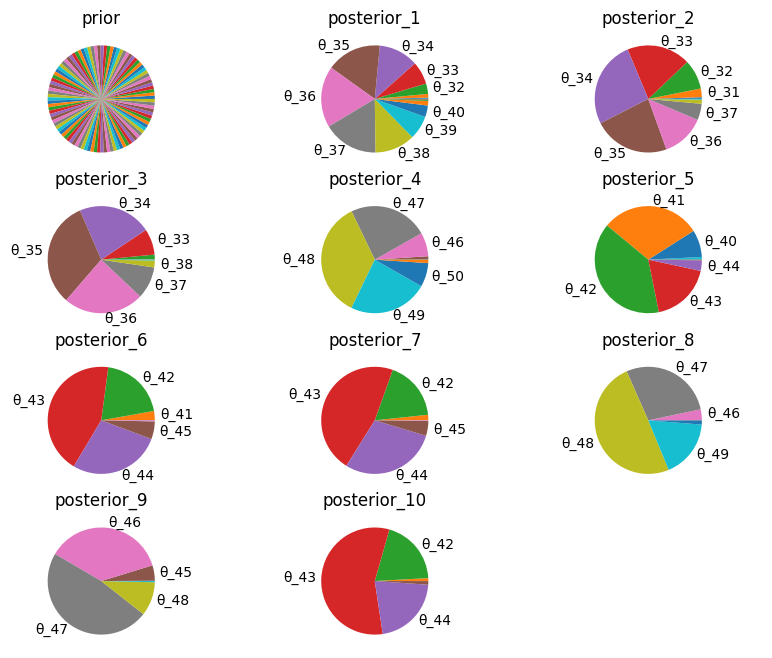

In [5]:

my_uniform_prior = [1/m]*m

bayes_pie_binomial(n, m, my_uniform_prior, my_data)

## Outcome with non-uniform prior

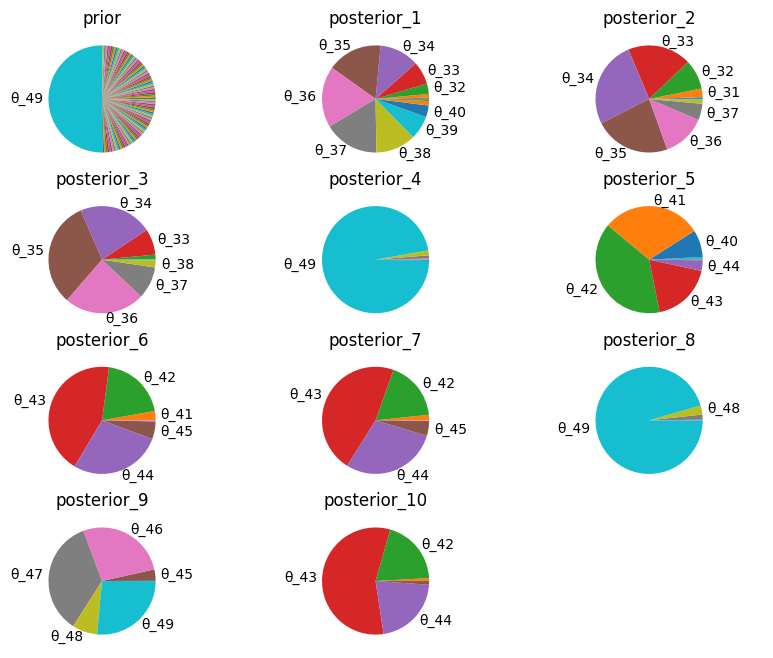

In [6]:
my_nonuniform_prior = [0 for _ in range(m)]

my_nonuniform_prior = [(1-my_non_uniform_value)/m] * m

my_nonuniform_prior[m//2] = my_non_uniform_value

bayes_pie_binomial(n, m, my_nonuniform_prior, my_data)